# Demo in Julia language 

This notebook uses **IJulia**: a [Julia-language](http://julialang.org/) backend combined with the [IPython](http://ipython.org/) interactive environment as Jupyter notebook.

## Basic Julia interaction

Basic mathematical expressions work like you expect: 

In [2]:
a = 1 + sin(3)-log(5)

-0.46831790437423315

In [3]:
b = [1.,2.,3.,4.,5.,6.]
c = [a+b[i] for i=1:6]

6-element Array{Float64,1}:
 0.5316820956257668
 1.5316820956257668
 2.531682095625767 
 3.531682095625767 
 4.531682095625767 
 5.531682095625767 

Previous outputs can be referred to via `Out[`*n*`]`, following the IPython, for example `Out[2]` for the result above.  You can also use the shorthand `_2`, or `_` for the previous result, as in IPython.  Like in Matlab, `ans` can also be used to refer to the previous result, *even if it was not printed* (when the command ended with `;`).

For example, the harmonic series above should be converging (slowly) to $\ln 2$, and we can check this:

In [4]:
Out[2]+1

0.5316820956257668

Like Matlab or Scipy + Numpy, Julia has lots of mathematical functions and linear algebra built in.  For example, we can define a $500\times500$ random matrix $R$ and form the positive-definite matrix $R^* R$:

In [6]:
R = rand(500,500)
R' * R

500×500 Array{Float64,2}:
 171.921  140.247  125.478  132.171  …  124.009  133.017  128.291  127.532
 140.247  183.437  134.547  140.561     131.54   142.608  134.083  137.684
 125.478  134.547  164.736  128.625     122.699  133.011  126.399  126.383
 132.171  140.561  128.625  175.314     129.02   131.656  126.384  131.473
 122.611  132.609  121.282  126.551     121.033  131.503  126.442  124.716
 125.62   133.487  122.169  126.543  …  121.819  130.847  124.293  130.225
 122.257  128.055  119.425  123.591     116.79   123.519  118.592  118.775
 120.807  131.71   119.664  124.125     121.091  123.696  124.077  124.966
 131.82   137.971  124.06   126.837     122.523  134.26   127.754  127.958
 122.147  129.859  119.94   118.706     119.271  126.348  125.304  122.648
 122.517  129.048  116.727  122.116  …  118.734  123.841  120.775  122.511
 121.99   130.936  118.567  123.869     122.445  130.35   121.746  124.881
 126.943  132.744  120.966  125.569     123.959  129.768  125.143  127.49 

(Notice that, by default, only a portion of a large matrix is shown.)

Standard output from Julia is also captured and sent to the IJulia notebook as you'd expect:

In [5]:
println("Hello world!\n")

Hello world!



IJulia even captures output from external C libraries (and notice how easy it is using Julia's `ccall` intrinsic):

In [7]:
ccall(:printf, Cint, (Ptr{UInt8},), "Hello from C!!\n");

Hello from C!!


We can define functions, of course, and use them in later input cells:

In [8]:
f(x) = x .+ 1

f (generic function with 1 method)

In [9]:
println(f(3))
f([1,1,2,3,5,8])

4


6-element Array{Int64,1}:
 2
 2
 3
 4
 6
 9

Notice that the input above both printed an scalar to `STDOUT` and also returned a vector, the latter using Julia's ability to write polymorphic functions and built-in array operations.

On the other hand adding a string to a number is not defined (there is no `+` method defined for those types, although we could easily add one), and attempting to do so will throw an exception:

In [10]:
f("Hello?")

MethodError: MethodError: no method matching +(::String, ::Int64)
Closest candidates are:
  +(::Any, ::Any, !Matched::Any, !Matched::Any...) at operators.jl:529
  +(!Matched::Complex{Bool}, ::Real) at complex.jl:297
  +(!Matched::Missing, ::Number) at missing.jl:115
  ...

# Interactive Plotting in IJulia

Plots can be done using "Plots" package.


In [11]:
# first install Plots package - Plots are already installed comment following line
import Pkg; Pkg.add("Plots")


  Updating registry at `~/.julia/registries/General`
  Updating git-repo `https://github.com/JuliaRegistries/General.git`
Fetching: [========================================>]  100.0 %.0 % Resolving package versions...
 Installed ForwardDiff ─ v0.10.9
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
  [f6369f11] ↑ ForwardDiff v0.10.8 ⇒ v0.10.9


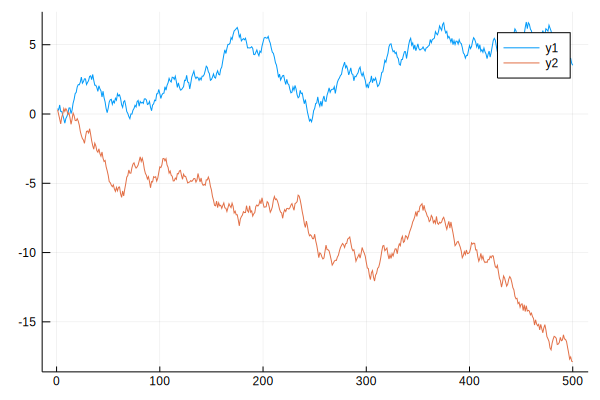

In [12]:
using Plots

# plot some data
plot([cumsum(rand(500) .- 0.5), cumsum(rand(500) .- 0.5)])


Below we'll show off some plotting using the excellent Gadfly package. The plots are heavily inspired by [this blog post](http://int8.io/basic-visualization-in-julia-gadfly/).
First we will install the packages (if not already installed), it may take several minutes.

In [13]:
# first time we need to install RDatasets and Gadfly, then it may be commented out
import Pkg;Pkg.add(["RDatasets","Gadfly"])

 Resolving package versions...
  Updating `~/.julia/environments/v1.3/Project.toml`
 [no changes]
  Updating `~/.julia/environments/v1.3/Manifest.toml`
 [no changes]


In [14]:
using RDatasets
sleep = dataset("lme4","sleepstudy")

┌ Info: Precompiling RDatasets [ce6b1742-4840-55fa-b093-852dadbb1d8b]
└ @ Base loading.jl:1273


,Reaction,Days,Subject
,Float64,Int32,Categorical…
1,249.56,0,308
2,258.705,1,308
3,250.801,2,308
4,321.44,3,308
5,356.852,4,308
6,414.69,5,308
7,382.204,6,308
8,290.149,7,308
9,430.585,8,308


`Gadfly` and `Plots` both define `plot()` function. In order to use gadfly plot - explicitly reference it.

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = evalmapping at dataframes.jl:96 [inlined]
└ @ Core /home/vagrant/.julia/packages/Gadfly/1wgcD/src/dataframes.jl:96


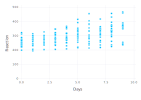

In [18]:
using Gadfly
Gadfly.plot(sleep, x = "Days", y = "Reaction", Geom.point)

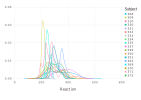

In [19]:
Gadfly.plot(sleep, x = "Reaction", Geom.density, color = "Subject", Scale.x_continuous(minvalue= 0, maxvalue= 500))

┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1
┌ Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
│   caller = top-level scope at In[20]:1
└ @ Core In[20]:1


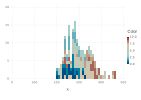

In [20]:
Gadfly.plot(x = sleep[:Reaction], Geom.histogram(bincount = 30), Scale.x_continuous(minvalue = 200), color = sleep[:Days])